In [21]:
%%time
import malaya
import tweepy
import pandas as pd
import re   
from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os
plt.style.use('fivethirtyeight')

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
# Load Twitter API consumer and secret keys from .env
load_dotenv()

True

In [23]:
consumer_key = os.getenv('CONSUMER_KEY')
consumer_secret = os.getenv('CONSUMER_SECRET')
access_token = os.getenv('ACCESS_SECRET')
access_token_secret = os.getenv('ACCESS_TOKEN_SECRET')

auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)

In [24]:
api=tweepy.API(auth)

In [25]:
# from:{twitter user @} to search tweets from the author
username="from:MySamudera"

In [26]:
public_tweets=api.search_tweets(username+' exclude:retweets exclude:replies',count='10',tweet_mode="extended")
i=1
for tweet in public_tweets:
    print(str(i)+')'+tweet.full_text+" \n")
    i=i+1

1)Wajib tahu, jika anda kemalangan &amp; tuntutan yg anda boleh buat, tahu hak kita 💪

Lanjut di: https://t.co/CWLfterIBn 

2)Nomura menyifatkan langkah itu bakal memberi kesan buruk di seluruh Asia: 

https://t.co/FlsMpKXkbv 

3)Tamat Pengajian Dengan Cemerlang, Ini Wanita Malaysia Pertama Diterima Masuk Ke Akademi Tentera Laut AS..

Kisah datuknya yg dulu pernah menerbangkan Helikopter Nuri di utara Malaysia pada 1980an ketika pemberontakan kedua berlaku menjadi inspirasi Janushaa.. 👇🏻 https://t.co/ZgxzW3CtWn 

4)Kementerian Haji dan Umrah Saudi telah memperkenalkan Maqam, sebuah platform yang membenarkan jemaah luar membuat tempahan umrah dan mendapatkan visa secara atas talian.

Baca di: https://t.co/weG3eKHPHe 

5)Hari ini ramai yang tertanya-tanya, boleh ke cakap RIP jika ada kawan bukan Muslim meninggal?
.
“Kita pakai pandangan mufti kita,” tegas Menteri di Jabatan Perdana Menteri (Hal Ehwal Agama) Datuk Hj Idris Ahmad. https://t.co/nl55s1s52N 

6)Laporan Pertubuhan Kesihatan Du

In [27]:
pd.set_option('display.max_colwidth', None)
df = pd.DataFrame([tweet.full_text for tweet in public_tweets], columns=['Tweets'])

# Show the first 5 rows
df.head(10)

,Tweets
0,"Wajib tahu, jika anda kemalangan &amp; tuntutan yg anda boleh buat, tahu hak kita 💪\n\nLanjut di: https://t.co/CWLfterIBn"
1,Nomura menyifatkan langkah itu bakal memberi kesan buruk di seluruh Asia: \n\nhttps://t.co/FlsMpKXkbv
2,"Tamat Pengajian Dengan Cemerlang, Ini Wanita Malaysia Pertama Diterima Masuk Ke Akademi Tentera Laut AS..\n\nKisah datuknya yg dulu pernah menerbangkan Helikopter Nuri di utara Malaysia pada 1980an ketika pemberontakan kedua berlaku menjadi inspirasi Janushaa.. 👇🏻 https://t.co/ZgxzW3CtWn"
3,"Kementerian Haji dan Umrah Saudi telah memperkenalkan Maqam, sebuah platform yang membenarkan jemaah luar membuat tempahan umrah dan mendapatkan visa secara atas talian.\n\nBaca di: https://t.co/weG3eKHPHe"
4,"Hari ini ramai yang tertanya-tanya, boleh ke cakap RIP jika ada kawan bukan Muslim meninggal?\n.\n“Kita pakai pandangan mufti kita,” tegas Menteri di Jabatan Perdana Menteri (Hal Ehwal Agama) Datuk Hj Idris Ahmad. https://t.co/nl55s1s52N"
5,Laporan Pertubuhan Kesihatan Dunia (WHO) menunjukkan bahawa 1 dari 3 penduduk dunia tidak mempunyai akses kepada air bersih.\n\nBaca di: https://t.co/GhVweDKcO3
6,"November ini, hati-hati semua 😭 \n\nhttps://t.co/3EXVx234H3"
7,Gempa bumi berukuran 7.6 skala Richter menggegarkan pantai Pasifik tengah Mexico semalam menyebabkan sekurang-kurangnya seorang terbunuh: https://t.co/ugtbUwnNcE
8,"Kecoh dua tiga hari ini tentang dunia yang dijangka akan terjerumus ke dalam kemelesetan pada 2023.\n.\nBank Dunia juga beri amaran, bank-bank pusat di seluruh global secara serentak menaikkan kadar faedah untuk bertindak balas terhadap inflasi. https://t.co/7KCYmaa8Nd"
9,"Rohingya mengaku membayar antara RM5,000 hingga RM7,000 kepada ejen bagi urusan dapatkan kad UNHCR: https://t.co/NBogBbLqnz"


In [28]:
# filter columns
def cleanTweet(tweet):
    # remove hyperlinks
    tweet= re.sub(r'https?:\/\/\S+','',tweet) 
    return tweet

df['Tweets']=df['Tweets'].apply(cleanTweet)
df['name_length'] = df['Tweets'].str.len()
df.head()

,Tweets,name_length
0,"Wajib tahu, jika anda kemalangan &amp; tuntutan yg anda boleh buat, tahu hak kita 💪\n\nLanjut di:",96
1,Nomura menyifatkan langkah itu bakal memberi kesan buruk di seluruh Asia: \n\n,76
2,"Tamat Pengajian Dengan Cemerlang, Ini Wanita Malaysia Pertama Diterima Masuk Ke Akademi Tentera Laut AS..\n\nKisah datuknya yg dulu pernah menerbangkan Helikopter Nuri di utara Malaysia pada 1980an ketika pemberontakan kedua berlaku menjadi inspirasi Janushaa.. 👇🏻",263
3,"Kementerian Haji dan Umrah Saudi telah memperkenalkan Maqam, sebuah platform yang membenarkan jemaah luar membuat tempahan umrah dan mendapatkan visa secara atas talian.\n\nBaca di:",180
4,"Hari ini ramai yang tertanya-tanya, boleh ke cakap RIP jika ada kawan bukan Muslim meninggal?\n.\n“Kita pakai pandangan mufti kita,” tegas Menteri di Jabatan Perdana Menteri (Hal Ehwal Agama) Datuk Hj Idris Ahmad.",212


In [29]:
# df = df[df['name_length'] > 1]    
df=df.drop(columns=['name_length'])
# Load multinomial modeldf.head()

In [30]:
# Load multinomial model
multinomial_model = malaya.sentiment.multinomial()

In [31]:
# Predict sentiment with multinomial model
def getMultinomialSentiment(tweet):
    return multinomial_model.predict([tweet])

df['Sentiment_1']= df['Tweets'].apply(getMultinomialSentiment)

# Display the data
df.head()

,Tweets,Sentiment_1
0,"Wajib tahu, jika anda kemalangan &amp; tuntutan yg anda boleh buat, tahu hak kita 💪\n\nLanjut di:",[negative]
1,Nomura menyifatkan langkah itu bakal memberi kesan buruk di seluruh Asia: \n\n,[neutral]
2,"Tamat Pengajian Dengan Cemerlang, Ini Wanita Malaysia Pertama Diterima Masuk Ke Akademi Tentera Laut AS..\n\nKisah datuknya yg dulu pernah menerbangkan Helikopter Nuri di utara Malaysia pada 1980an ketika pemberontakan kedua berlaku menjadi inspirasi Janushaa.. 👇🏻",[positive]
3,"Kementerian Haji dan Umrah Saudi telah memperkenalkan Maqam, sebuah platform yang membenarkan jemaah luar membuat tempahan umrah dan mendapatkan visa secara atas talian.\n\nBaca di:",[negative]
4,"Hari ini ramai yang tertanya-tanya, boleh ke cakap RIP jika ada kawan bukan Muslim meninggal?\n.\n“Kita pakai pandangan mufti kita,” tegas Menteri di Jabatan Perdana Menteri (Hal Ehwal Agama) Datuk Hj Idris Ahmad.",[negative]


In [32]:
# Predict sentiment with multinomial probability
def getMultinomialProba(tweet):
    return multinomial_model.predict_proba([tweet])

df['Probability']= df['Tweets'].apply(getMultinomialProba)

# Show the multinomial probability
print(df['Probability'])                                                            

0      [{'negative': 0.4086120589332872, 'neutral': 0.28019353305431716, 'positive': 0.3111944080123929}]
1     [{'negative': 0.3340592406894674, 'neutral': 0.36025465278546276, 'positive': 0.30568610652507006}]
2      [{'negative': 0.3379650914553485, 'neutral': 0.2526225987828954, 'positive': 0.40941230976175824}]
3      [{'negative': 0.5209316003010455, 'neutral': 0.16533549229172906, 'positive': 0.3137329074072273}]
4     [{'negative': 0.6004998984192693, 'neutral': 0.16881346463849095, 'positive': 0.23068663694223704}]
5       [{'negative': 0.389624955252672, 'neutral': 0.22008955073589326, 'positive': 0.3902854940114383}]
6     [{'negative': 0.39036929836308937, 'neutral': 0.29759127810190333, 'positive': 0.3120394235350083}]
7    [{'negative': 0.36343308504479016, 'neutral': 0.34020898110426256, 'positive': 0.29635793385094694}]
8      [{'negative': 0.5817043936654591, 'neutral': 0.12593974389799342, 'positive': 0.2923558624365499}]
9      [{'negative': 0.4573725921758362, 'neut

In [33]:
# Load quantized model
quantized_model = malaya.sentiment.transformer(model = 'fastformer', quantized = True)

In [34]:
# Predict sentiment with Quantized model
def getQuantizedSentiment(tweet):
    return quantized_model.predict([tweet])

df['Sentiment_2']= df['Tweets'].apply(getQuantizedSentiment)
# Show new data
df.head()

,Tweets,Sentiment_1,Probability,Sentiment_2
0,"Wajib tahu, jika anda kemalangan &amp; tuntutan yg anda boleh buat, tahu hak kita 💪\n\nLanjut di:",[negative],"[{'negative': 0.4086120589332872, 'neutral': 0.28019353305431716, 'positive': 0.3111944080123929}]",[neutral]
1,Nomura menyifatkan langkah itu bakal memberi kesan buruk di seluruh Asia: \n\n,[neutral],"[{'negative': 0.3340592406894674, 'neutral': 0.36025465278546276, 'positive': 0.30568610652507006}]",[neutral]
2,"Tamat Pengajian Dengan Cemerlang, Ini Wanita Malaysia Pertama Diterima Masuk Ke Akademi Tentera Laut AS..\n\nKisah datuknya yg dulu pernah menerbangkan Helikopter Nuri di utara Malaysia pada 1980an ketika pemberontakan kedua berlaku menjadi inspirasi Janushaa.. 👇🏻",[positive],"[{'negative': 0.3379650914553485, 'neutral': 0.2526225987828954, 'positive': 0.40941230976175824}]",[positive]
3,"Kementerian Haji dan Umrah Saudi telah memperkenalkan Maqam, sebuah platform yang membenarkan jemaah luar membuat tempahan umrah dan mendapatkan visa secara atas talian.\n\nBaca di:",[negative],"[{'negative': 0.5209316003010455, 'neutral': 0.16533549229172906, 'positive': 0.3137329074072273}]",[neutral]
4,"Hari ini ramai yang tertanya-tanya, boleh ke cakap RIP jika ada kawan bukan Muslim meninggal?\n.\n“Kita pakai pandangan mufti kita,” tegas Menteri di Jabatan Perdana Menteri (Hal Ehwal Agama) Datuk Hj Idris Ahmad.",[negative],"[{'negative': 0.6004998984192693, 'neutral': 0.16881346463849095, 'positive': 0.23068663694223704}]",[neutral]


In [35]:
# Get sentiment probability with Quantized model
def getQuantizedProba(tweet):
    return quantized_model.predict_proba([tweet])

df['Probability']= df['Tweets'].apply(getQuantizedProba)

# Show the multinomial probability
print(df['Probability'])    

0     [{'negative': 0.0012759, 'neutral': 0.99836195, 'positive': 0.00036228634}]
1        [{'negative': 0.010009523, 'neutral': 0.9737006, 'positive': 0.0162898}]
2    [{'negative': 0.008902895, 'neutral': 0.0141514875, 'positive': 0.97694546}]
3     [{'negative': 0.0155684175, 'neutral': 0.9800162, 'positive': 0.004415492}]
4      [{'negative': 0.002463405, 'neutral': 0.9610876, 'positive': 0.036448974}]
5     [{'negative': 0.0023104863, 'neutral': 0.21141441, 'positive': 0.78627515}]
6    [{'negative': 0.0043456517, 'neutral': 0.98508626, 'positive': 0.010568085}]
7         [{'negative': 0.675018, 'neutral': 0.24717195, 'positive': 0.07780995}]
8       [{'negative': 0.010378015, 'neutral': 0.011424017, 'positive': 0.978198}]
9       [{'negative': 0.14659905, 'neutral': 0.74457735, 'positive': 0.10882352}]
Name: Probability, dtype: object


In [36]:
print(df.values)

[['Wajib tahu, jika anda kemalangan &amp; tuntutan yg anda boleh buat, tahu hak kita 💪\n\nLanjut di: '
  list(['negative'])
  list([{'negative': 0.0012759, 'neutral': 0.99836195, 'positive': 0.00036228634}])
  list(['neutral'])]
 ['Nomura menyifatkan langkah itu bakal memberi kesan buruk di seluruh Asia: \n\n'
  list(['neutral'])
  list([{'negative': 0.010009523, 'neutral': 0.9737006, 'positive': 0.0162898}])
  list(['neutral'])]
 ['Tamat Pengajian Dengan Cemerlang, Ini Wanita Malaysia Pertama Diterima Masuk Ke Akademi Tentera Laut AS..\n\nKisah datuknya yg dulu pernah menerbangkan Helikopter Nuri di utara Malaysia pada 1980an ketika pemberontakan kedua berlaku menjadi inspirasi Janushaa.. 👇🏻 '
  list(['positive'])
  list([{'negative': 0.008902895, 'neutral': 0.0141514875, 'positive': 0.97694546}])
  list(['positive'])]
 ['Kementerian Haji dan Umrah Saudi telah memperkenalkan Maqam, sebuah platform yang membenarkan jemaah luar membuat tempahan umrah dan mendapatkan visa secara atas tal

In [37]:
# Save dataFrame to .csv
df.to_csv(r'tweet_sentiment.csv', index = False)

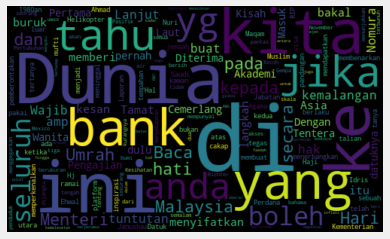

In [38]:
# Plot the World CLoud
allWords= ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500,height=300, random_state=21, max_font_size=120).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [39]:
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

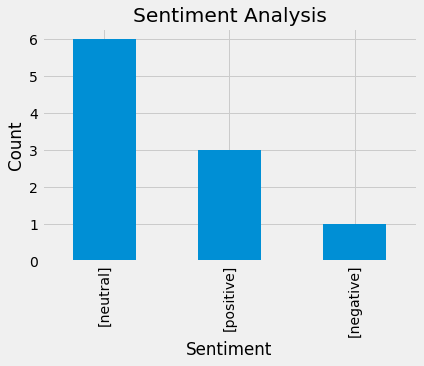

In [40]:
df['Sentiment_2'].value_counts()

plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Count")
df['Sentiment_2'].value_counts().plot(kind='bar')
plt.show()
